# Sample usage of stable_baselines3

In [1]:
from src.envs import NoThreeCollinearEnv, NoIsoscelesEnv, NoStrictIsoscelesEnv
from stable_baselines3 import PPO

### Defining the environment and model

In [2]:
m = 50
n = 50

env = NoThreeCollinearEnv(m, n)
model = PPO('MlpPolicy', env, device="auto", gamma=1, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Training the model

In [5]:
model.learn(total_timesteps=1000000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 7.21     |
| time/              |          |
|    fps             | 3447     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 14.1       |
|    ep_rew_mean          | 8.76       |
| time/                   |            |
|    fps                  | 1554       |
|    iterations           | 2          |
|    time_elapsed         | 2          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.07825998 |
|    clip_fraction        | 0.4        |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.65      |
|    explained_variance   | 0.166      |
|    learning_rate        | 0.0003     |
|   

### Testing the model

totol reward: 35


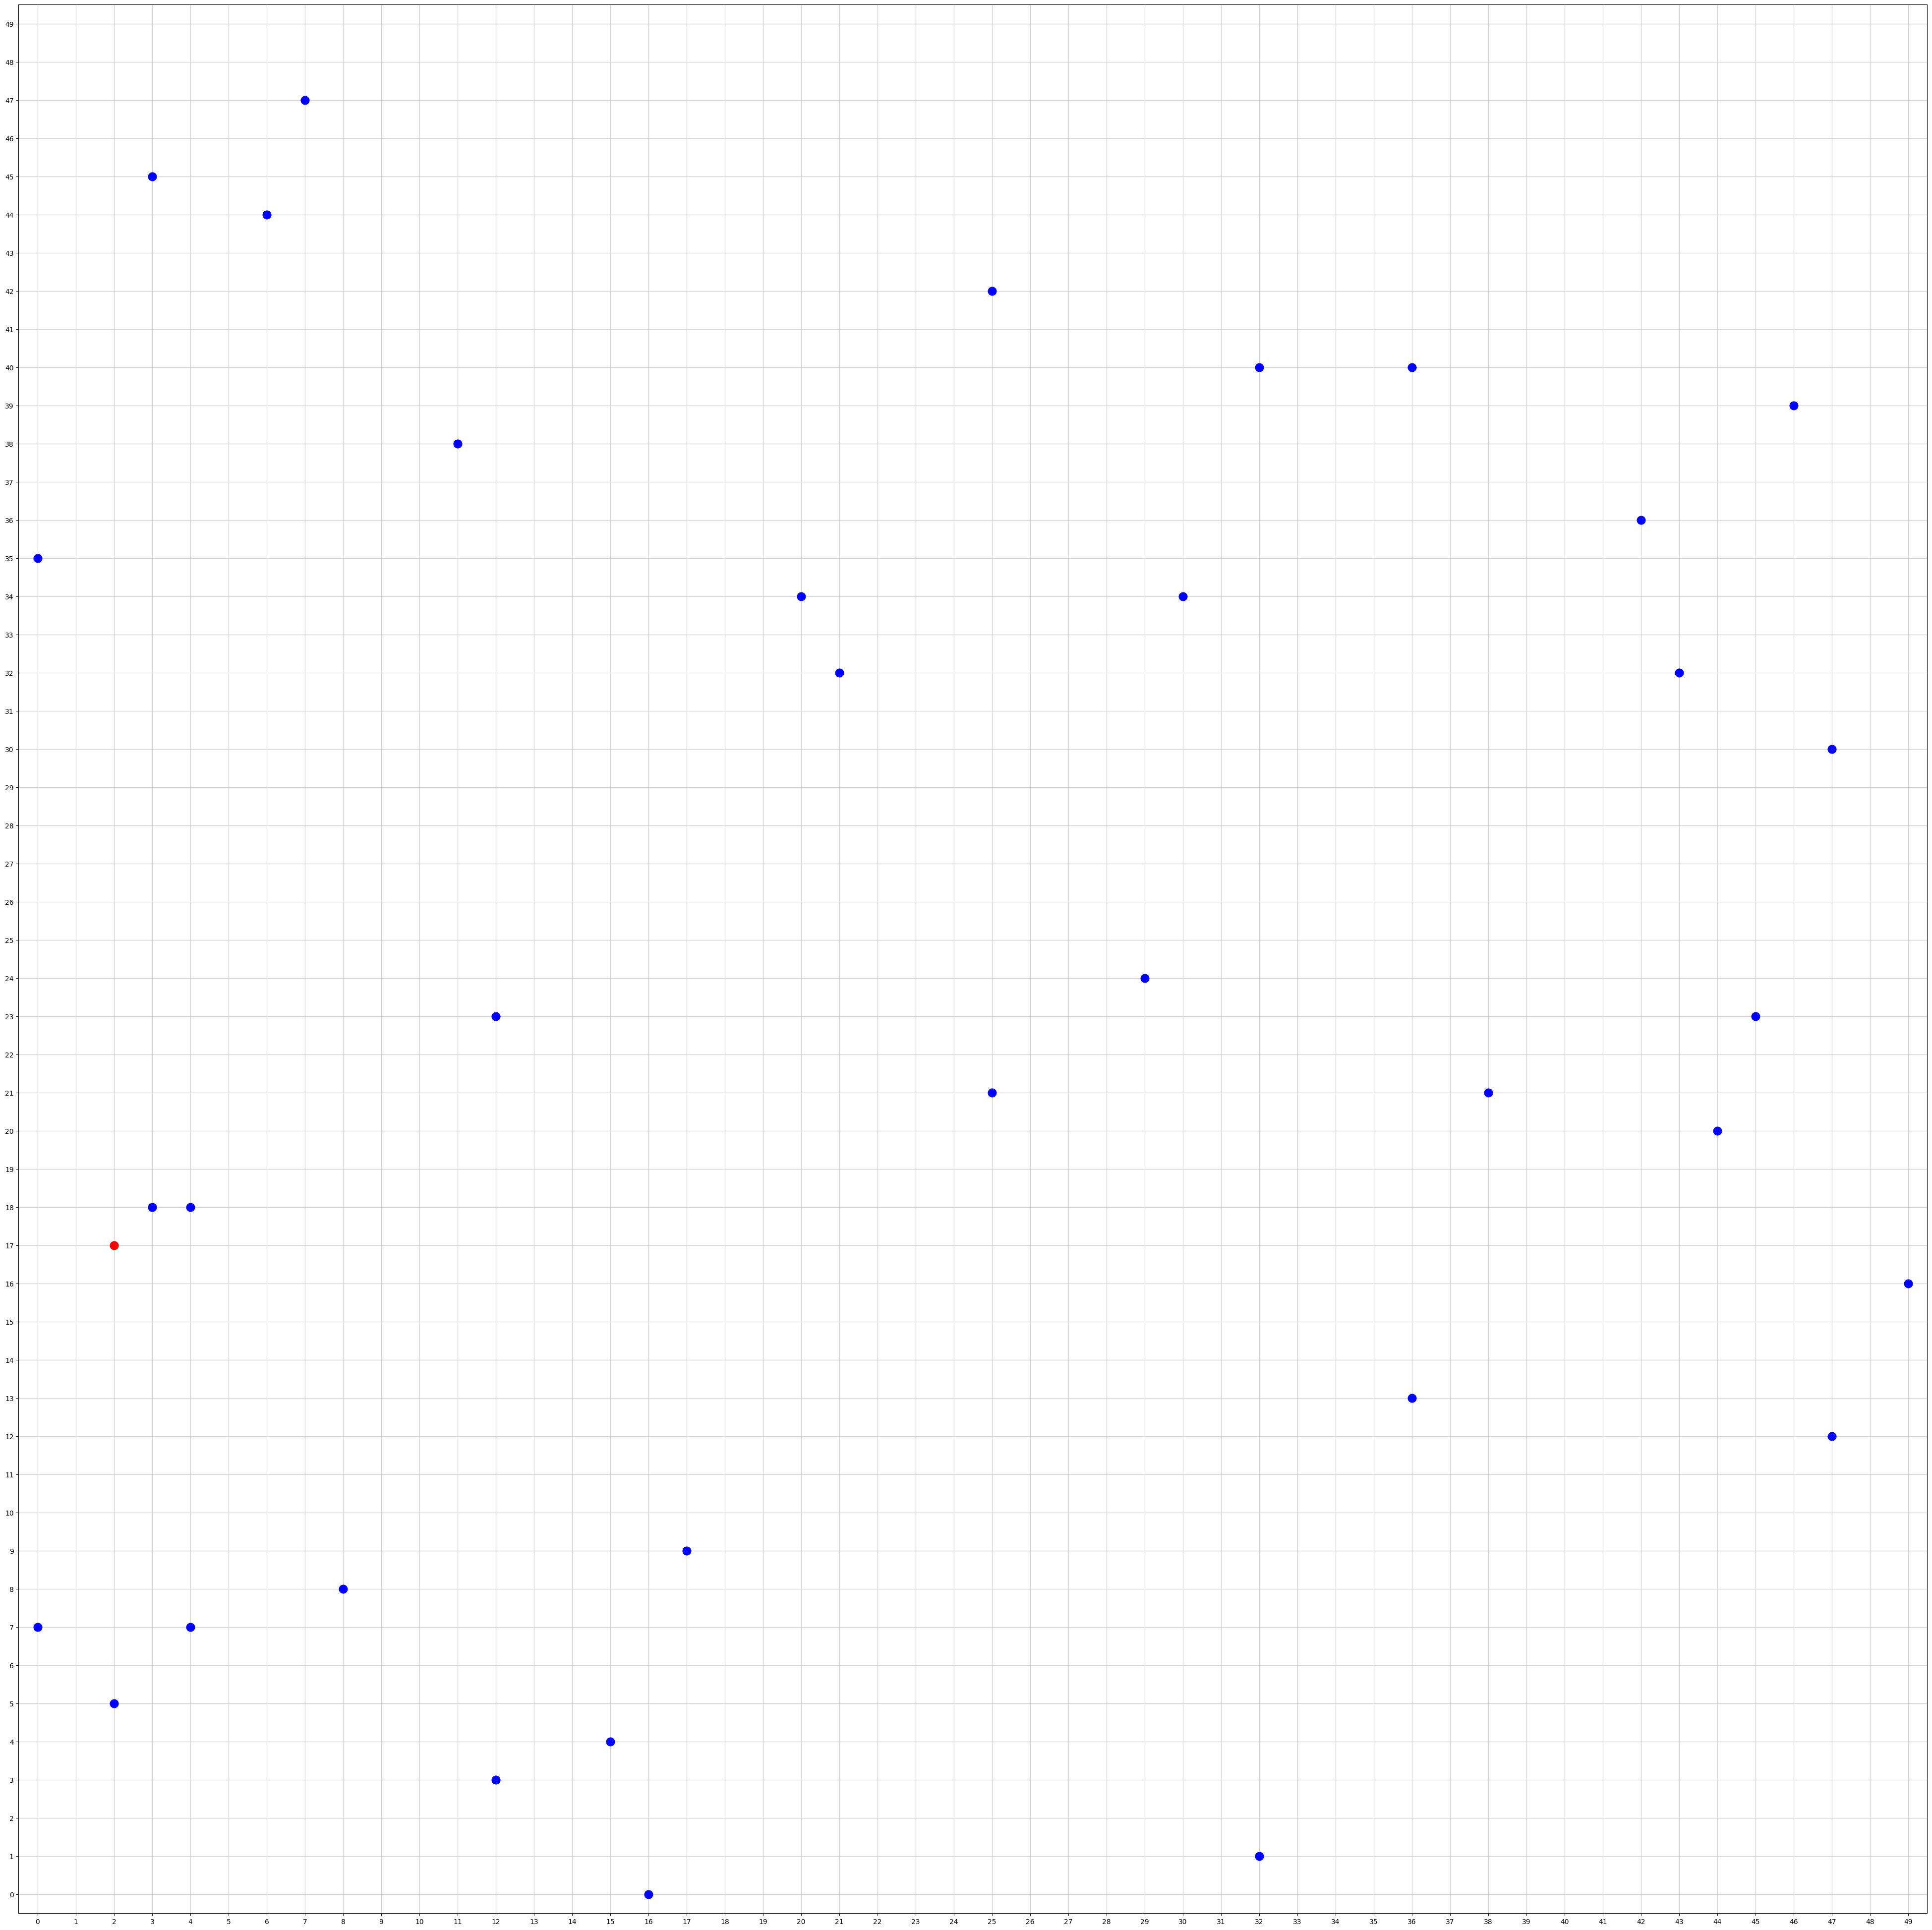

In [6]:
obs, _ = env.reset()
done = False

while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, _, _ = env.step(action)

total_reward = sum([1 for _ in env.points])
print("total reward:", total_reward)
env.plot()

In [10]:
result = []
for n in range(3, 100):
    env = NoThreeCollinearEnv(n, n)
    model = PPO('MlpPolicy', env, device="auto", gamma=1, verbose=0)
    model.learn(total_timesteps=100000)

    # testing the model
    obs, _ = env.reset()
    done = False

    while not done:
        action, _states = model.predict(obs)
        obs, rewards, done, _, _ = env.step(action)

    total_reward = sum([1 for _ in env.points])
    print("grid_size: ", n, "totol reward:", total_reward)
    result.append(n)


grid_size:  3 totol reward: 5
grid_size:  4 totol reward: 7
grid_size:  5 totol reward: 6
grid_size:  6 totol reward: 8
grid_size:  7 totol reward: 5
grid_size:  8 totol reward: 7
grid_size:  9 totol reward: 6
grid_size:  10 totol reward: 5
grid_size:  11 totol reward: 3
grid_size:  12 totol reward: 9
grid_size:  13 totol reward: 10
grid_size:  14 totol reward: 9
grid_size:  15 totol reward: 5
grid_size:  16 totol reward: 5
grid_size:  17 totol reward: 6
grid_size:  18 totol reward: 3
grid_size:  19 totol reward: 10
grid_size:  20 totol reward: 10
grid_size:  21 totol reward: 9
grid_size:  22 totol reward: 12
grid_size:  23 totol reward: 6


KeyboardInterrupt: 